In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sentiment Analysis Book Chapter/MLTweet.csv')
df

,Unnamed: 0,Subjectivity,Polarity,Sentiment
0,0,0.000000,0.000000,0
1,1,0.000000,0.000000,0
2,2,0.500000,0.000000,0
3,3,0.000000,0.000000,0
4,4,0.166667,0.000000,0
...,...,...,...,...
2221,2221,0.426190,0.332778,2
2222,2222,0.000000,0.000000,0
2223,2223,0.400000,0.300000,2
2224,2224,0.000000,0.000000,0


In [ ]:
#Using DataFrame.drop() method.
df2=df.drop(df.columns[0], axis=1)
df2

,Subjectivity,Polarity,Sentiment
0,0.000000,0.000000,0
1,0.000000,0.000000,0
2,0.500000,0.000000,0
3,0.000000,0.000000,0
4,0.166667,0.000000,0
...,...,...,...
2221,0.426190,0.332778,2
2222,0.000000,0.000000,0
2223,0.400000,0.300000,2
2224,0.000000,0.000000,0


In [ ]:
X=df2.iloc[:,:2].values
X

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.5       , 0.        ],
       ...,
       [0.4       , 0.3       ],
       [0.        , 0.        ],
       [0.26666667, 0.2       ]])

In [ ]:
Y=df2.iloc[:,2:].values
Y

array([[0],
       [0],
       [0],
       ...,
       [2],
       [0],
       [2]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train.ravel())

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

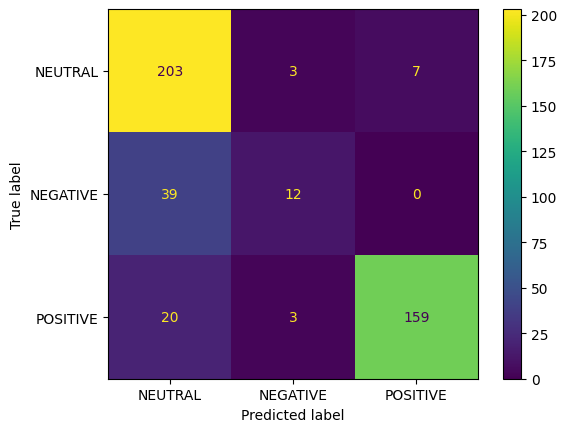

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NEUTRAL', 'NEGATIVE', 'POSITIVE'])
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       213
           1       0.67      0.24      0.35        51
           2       0.96      0.87      0.91       182

    accuracy                           0.84       446
   macro avg       0.80      0.69      0.71       446
weighted avg       0.84      0.84      0.82       446

